# Polynomial Regression -  Overfitting Simulation

In [1]:
# This notebook has been created to better understand the topics of overfitting-underfitting

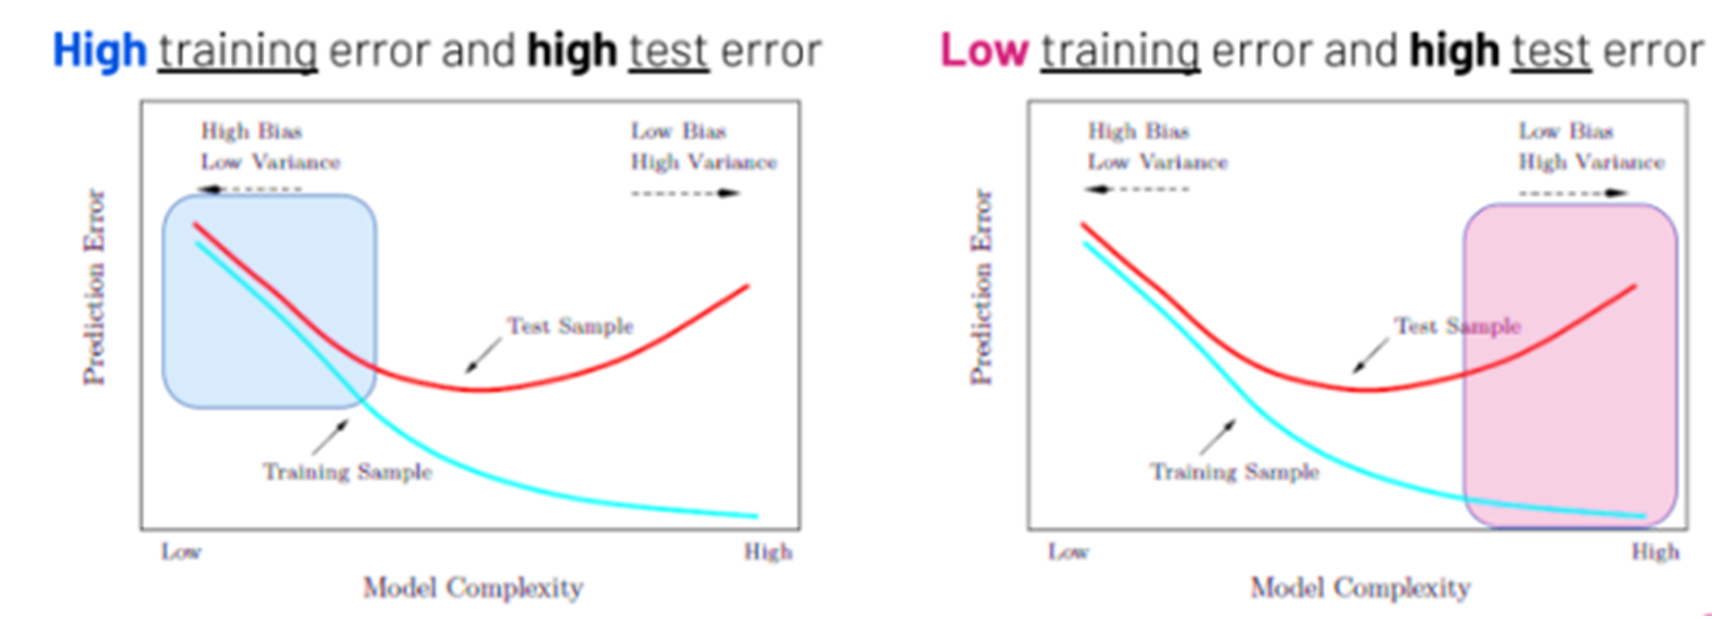

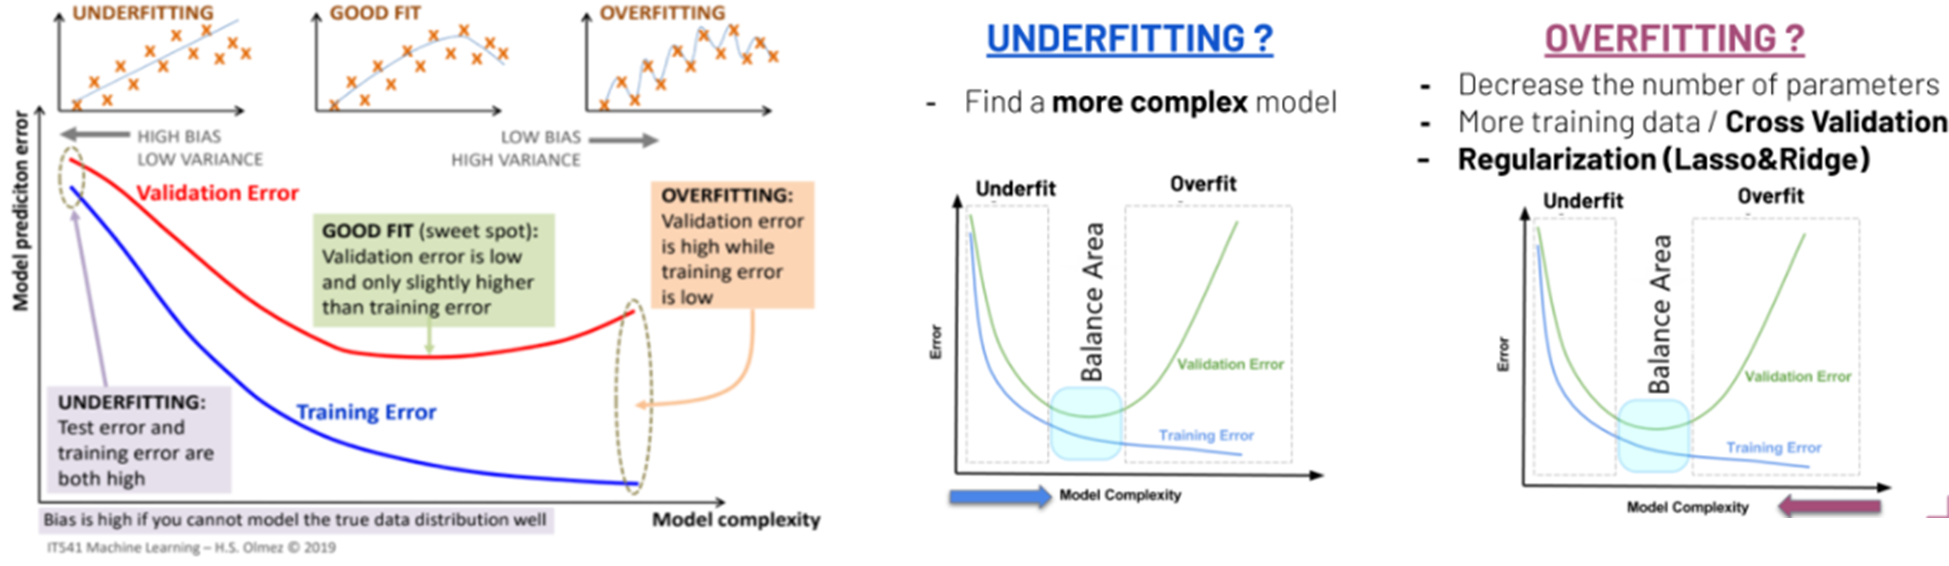

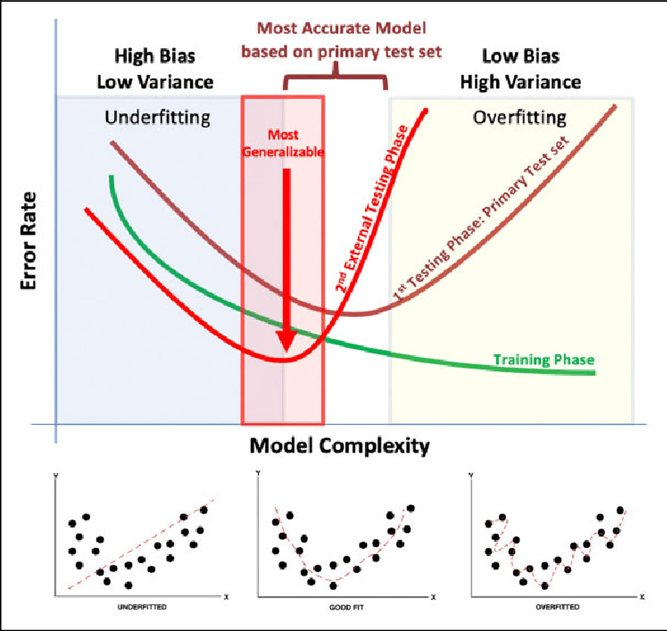

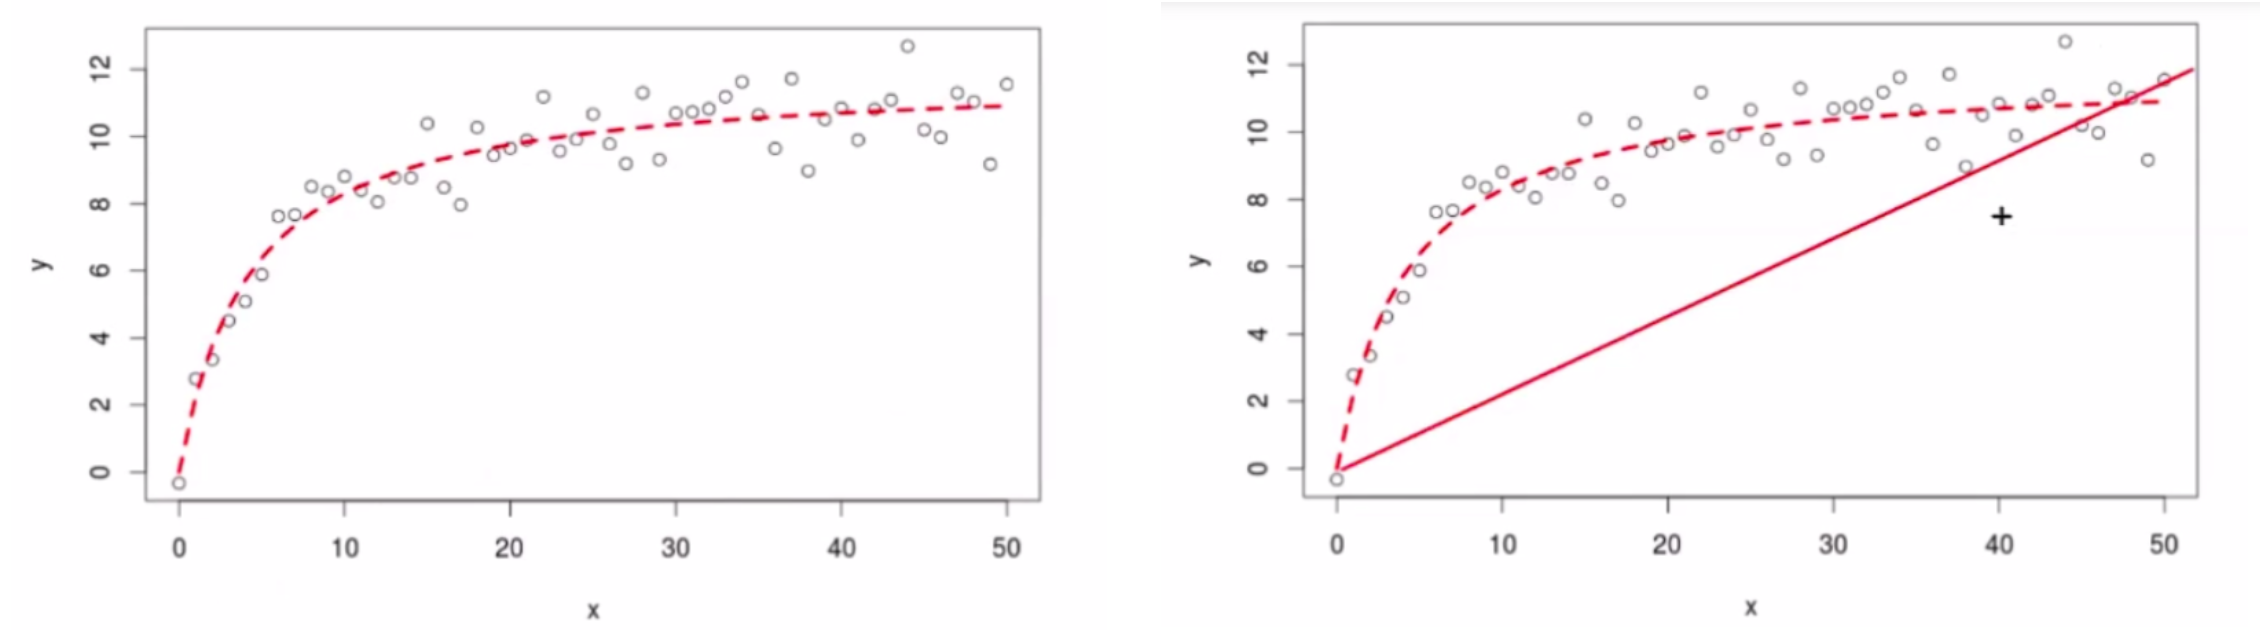

## Import libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] =(10,6)

## Polynomial Features

In [2]:
from sklearn.preprocessing import PolynomialFeatures

In [5]:
# let's evaluate it simply on a sample data set
data = np.array([[2,3,4]])
print(data)

[[2 3 4]]


In [3]:
poly_model = PolynomialFeatures(degree=2,include_bias=False)

In [6]:
poly_model.fit(data)

PolynomialFeatures(include_bias=False)

In a nutshell:
- For training data: `fit` followed by `transform` or directly `fit_transform`
- For test data: `transform` only

In [7]:
poly_model.transform(data)

# 2, 3, 4 , 2x3, 2x4, 3x4, 2**2, 3**2, 4**2.
# X1 ** 2 + X2 ** 2 + X3 ** 2 + X1X2 + X1X3 + X2X3 + X1 + X2 + X3 

array([[ 2.,  3.,  4.,  4.,  6.,  8.,  9., 12., 16.]])

In [8]:
# We can also use the following code to do both transformer and fit at the same time
# the above two operations can be done in one method 

poly_model.fit_transform(data)

array([[ 2.,  3.,  4.,  4.,  6.,  8.,  9., 12., 16.]])

In [9]:
# degree 3 increases both the number of features and the interpretation of the operation becomes difficult and complicated (19 values generated)
# 2, 3, 4, 2x3, 2x4, 3x4, 2**2, 3**2, 4**2, 2x3x4, 3x2**2, 4x2**2, 2x3**2, 4x3**2, 2x4**2, 3x4**2, 2**3, 3**3, 4**3

## Read Dataset

In [10]:
df = pd.read_csv('Advertising.csv')
df

TV  radio  newspaper  sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3    9.3
3    151.5   41.3       58.5   18.5
4    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4

[200 rows x 4 columns]

The numbers in the data set can be understood in thousands of units. The numbers in the “TV”, “Radio”, “Newspaper” and “Sales” columns in the “Advertising.csv” data set are expressed in thousands of units. That is, a value in these columns represents an amount that is actually a thousand times that value.

If a TV advertising spend is shown as 230.1, this means that 230,100 units (e.g. dollars, euros) were actually spent.
Similarly, if a sales value is shown as 22.1, it means that 22,100 units were actually sold.
This type of notation is often used to make large amounts of data more readable and manageable. Especially with financial data, it is important to express large numbers in a concise and understandable way.

We will increase the number of features by doing polynomial conversion. As a result of this process with degree= 2, we will have a total of 9 features. On this occasion, we will create artificial data with Feature engineering

## Polynomial Converter 

In [11]:
# Now let's use the Polynomial Features function to mathematically increase the number of features in our data set

In [12]:
X = df.drop(columns="sales")
y = df["sales"]

In [13]:
poly_conv = PolynomialFeatures(degree=2, include_bias=False)

In [14]:
poly_conv.fit(X)

PolynomialFeatures(include_bias=False)

In [15]:
# created polynomial features
poly_features = poly_conv.transform(X)
poly_features

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [21]:
# number of rows remained 200, feature increased from 3 to 9
poly_features.shape

(200, 9)

In [17]:
pd.DataFrame(poly_features, columns=["TV", "radio", "newspaper", "TV^2", "TV&radio", \
                                    "TV&newspaper", "radio^2", "radio&newspaper", "newspaper^2"]).head()

TV  radio  newspaper      TV^2  TV&radio  TV&newspaper  radio^2  \
0  230.1   37.8       69.2  52946.01   8697.78      15922.92  1428.84   
1   44.5   39.3       45.1   1980.25   1748.85       2006.95  1544.49   
2   17.2   45.9       69.3    295.84    789.48       1191.96  2106.81   
3  151.5   41.3       58.5  22952.25   6256.95       8862.75  1705.69   
4  180.8   10.8       58.4  32688.64   1952.64      10558.72   116.64   

   radio&newspaper  newspaper^2  
0          2615.76      4788.64  
1          1772.43      2034.01  
2          3180.87      4802.49  
3          2416.05      3422.25  
4           630.72      3410.56

In [18]:
# remember the original form
X.shape

(200, 3)

## Train | Test Split

In [22]:
from sklearn.model_selection import train_test_split
# as we have created the syntetic data using polynomial features it may have shortcomings, so no high hopes

In [23]:
X_train, X_test, y_train, y_test = train_test_split(poly_features,y,test_size=0.3,random_state=42)
# We preferred the data set with 9 features by taking poly_features instead of X

## Model fitting

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
model_poly = LinearRegression()

In [31]:
model_poly.fit(X_train, y_train)

LinearRegression()

In [32]:
y_pred = model_poly.predict(X_test)

In [33]:
compare = pd.DataFrame({"Actual": y_test,"pred": y_pred, "residual": y_test-y_pred})
compare

Actual       pred  residual
95     16.9  17.222638 -0.322638
15     22.4  22.764319 -0.364319
30     21.4  20.342403  1.057597
158     7.3   7.638231 -0.338231
128    24.7  24.430702  0.269298
115    12.6  12.626709 -0.026709
69     22.3  22.775810 -0.475810
170     8.4   8.172573  0.227427
174    11.5  12.143459 -0.643459
45     14.9  15.592958 -0.692958
66      9.5   7.703212  1.796788
182     8.7   8.139707  0.560293
165    11.9  11.940503 -0.040503
78      5.3   6.002394 -0.702394
186    10.3  10.521563 -0.221563
177    11.7  12.299989 -0.599989
56      5.5   6.734986 -1.234986
152    16.6  16.594051  0.005949
82     11.3  10.569666  0.730334
68     18.9  19.028970 -0.128970
124    19.7  20.154265 -0.454265
16     12.5  13.936888 -1.436888
148    10.9   9.492707  1.407293
93     22.2  22.090070  0.109930
65      9.3   8.817266  0.482734
60      8.1   7.638314  0.461686
84     21.7  22.368458 -0.668458
67     13.4  12.631052  0.768948
125    10.6  10.121423  0.478577
132     5.7   6.029139 -0.329139
9      10.6  11.669885 -1.069885
18     11.3  10.069603  1.230397
55     23.7  23.484331  0.215669
75      8.7   9.859344 -1.159344
150    16.1  15.338698  0.761302
104    20.7  21.073328 -0.373328
135    11.6  10.967627  0.632373
137    20.8  20.145547  0.654453
164    11.9  11.744708  0.155292
76      6.9   6.423151  0.476849
79     11.0  10.714502  0.285498
197    12.8  12.834290 -0.034290
38     10.1   9.189600  0.910400
24      9.7   8.913178  0.786822
122    11.6  11.871610 -0.271610
195     7.6   6.976269  0.623731
29     10.5   9.957134  0.542866
19     14.6  14.696208 -0.096208
143    10.4  10.105821  0.294179
86     12.0  11.255071  0.744929
114    14.6  14.041974  0.558026
173    11.7  12.142984 -0.442984
5       7.2   8.964119 -1.764119
126     6.6   7.544292 -0.944292
117     9.4   8.397397  1.002603
73     11.0  10.868546  0.131454
140    10.9   9.894713  1.005287
98     25.4  25.233737  0.166263
172     7.6   6.798770  0.801230
96     11.7  11.962032 -0.262032

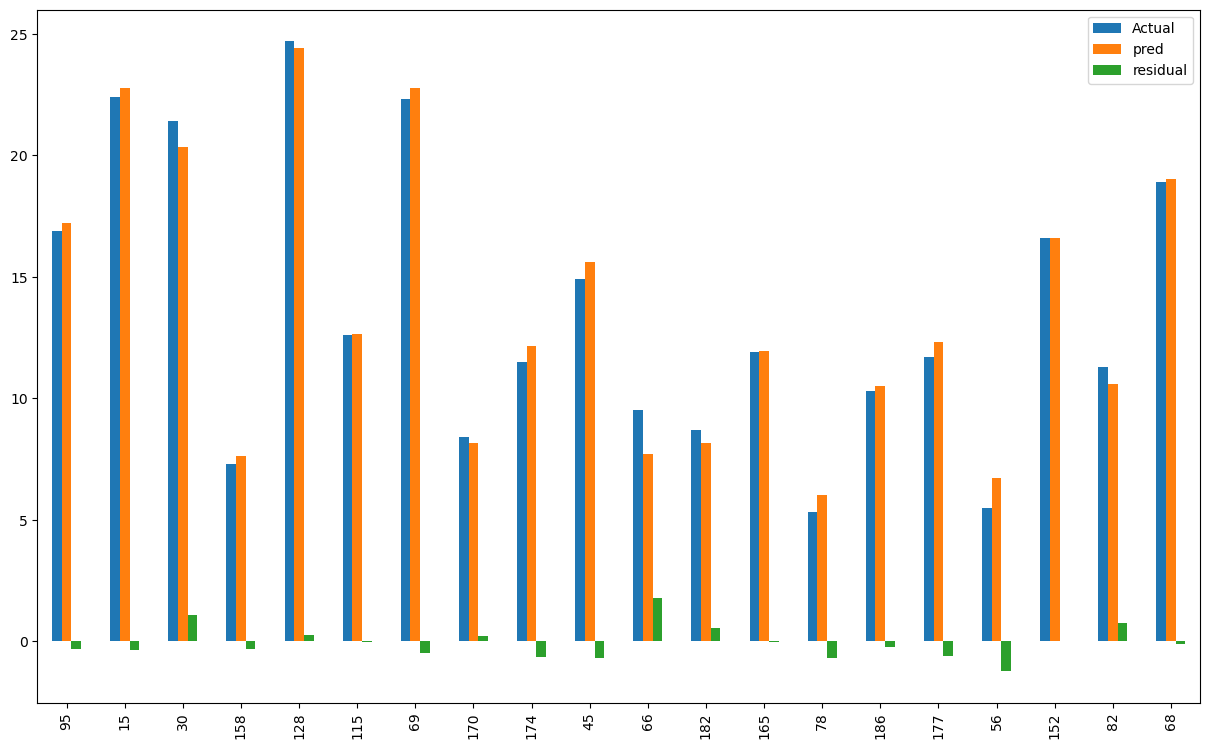

In [34]:
compare.head(20).plot(kind="bar",figsize=(15,9))
plt.show();

## Polynomial Coefficients

In [35]:
model_poly.coef_

array([ 0.05478172,  0.01311214,  0.01086391, -0.00011074,  0.00108048,
       -0.00010764,  0.00030191,  0.00017541,  0.00010075])

In [36]:
# let's create a df of coefficients to compare them with previous features
df_coef = pd.DataFrame(model_poly.coef_,index=["TV", "radio", "newspaper", "TV^2", "TV&radio", \
                                    "TV&newspaper", "radio^2", "radio&newspaper", "newspaper^2"], columns= ["coef"])

In [37]:
#coefficients tells me how much a 1 unit increase in feature will increase my prediction
df_coef

coef
TV               0.054782
radio            0.013112
newspaper        0.010864
TV^2            -0.000111
TV&radio         0.001080
TV&newspaper    -0.000108
radio^2          0.000302
radio&newspaper  0.000175
newspaper^2      0.000101

In [39]:
# let's manually put the first line in the prediction line...the picture below shows the first line values
model_poly.predict([[2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03]])

array([21.76437986])

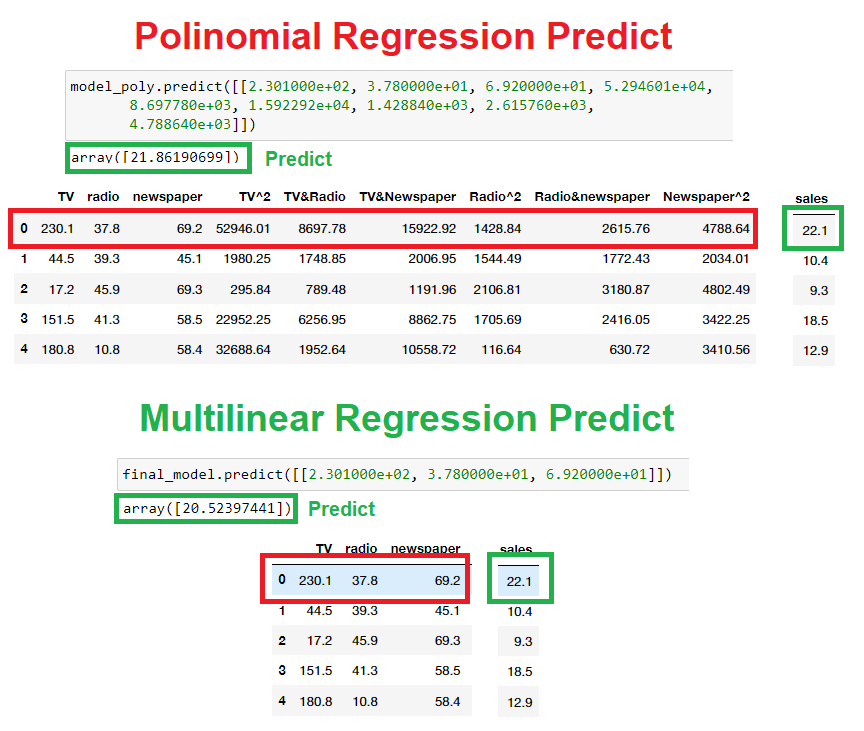

# Evaluation on the Test Set

In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [31]:
y_pred = model_poly.predict(X_test)

In [52]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [33]:
# Test scores
eval_metric(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9808386009966369
MAE 		: 0.5905974833808129
MSE 		: 0.5231944949055536
RMSE 		: 0.7233218473857634


In [34]:
y_train_pred = model_poly.predict(X_train)

In [35]:
# Train scores
eval_metric(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9865054729019952
MAE 		: 0.39112039812603905
MSE 		: 0.3541097754193403
RMSE 		: 0.5950712355838923


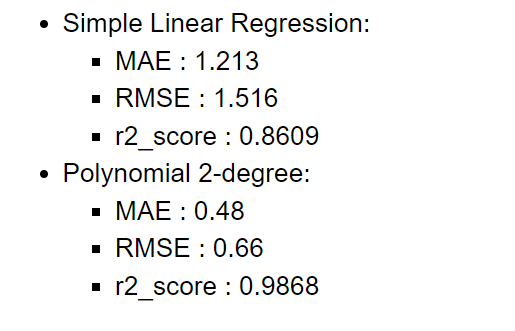

trying overfitting -- cannot directly decide based on the score above, must check the residual plot, must do cross validation, there's no feature or real data like tv^2, so it's just a synthetic or fake data created with mathematical manipulation just to increase the complexity and improve score.

# Find an Optimum Polynomial Degree

In [36]:
# will decide the optimum degree based on RMSE

In [37]:
def poly(d):   # write the degree
    train_rmse_errors = []   # trains rmse
    test_rmse_errors = []    # test rmse
    number_of_features = []  #
    for i in range(1, d):  # 1
        polynomial_converter = PolynomialFeatures(degree = i, include_bias =False)
        poly_features = polynomial_converter.fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
        model = LinearRegression(fit_intercept=True)
        model.fit(X_train, y_train)
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)
        train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
        test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))
        train_rmse_errors.append(train_RMSE)
        test_rmse_errors.append(test_RMSE)
        number_of_features.append(poly_features.shape[1])
    return pd.DataFrame({"train_rmse_errors": train_rmse_errors, "test_rmse_errors":test_rmse_errors, "number of features":number_of_features},
                        index=range(1,d))

In [38]:
poly(10)

train_rmse_errors  test_rmse_errors  number of features
1           1.734594          1.516152                   3
2           0.587957          0.664643                   9
3           0.433934          0.580329                  19
4           0.351708          0.507774                  34
5           0.250934          2.575825                  55
6           0.197125          4.492671                  83
7           5.421422       1381.404069                 119
8           0.142654       4449.568027                 164
9           0.166753      95893.026583                 219

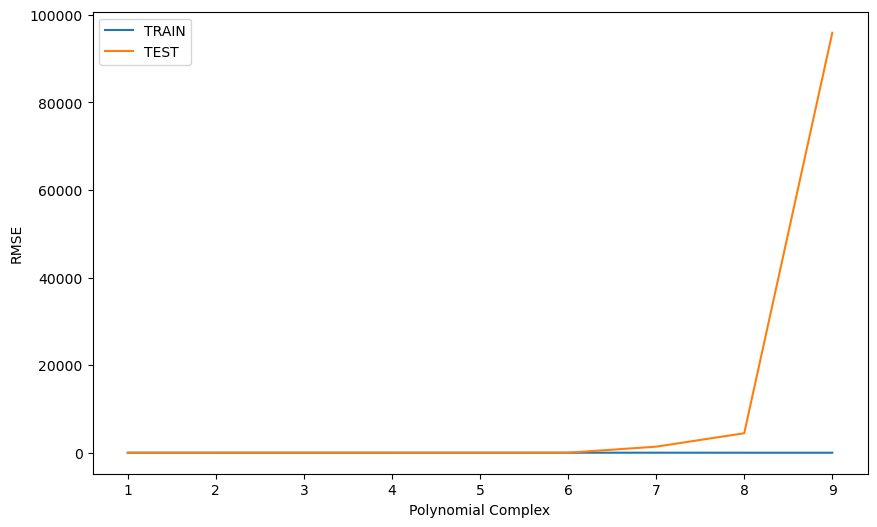

In [39]:
# Let's draw a graph of the above results and see the explosion point
plt.plot(range(1,10), poly(10)["train_rmse_errors"], label = "TRAIN")
plt.plot(range(1,10), poly(10)["test_rmse_errors"], label = "TEST")
plt.xlabel("Polynomial Complex")
plt.ylabel("RMSE")
plt.legend();
plt.show()

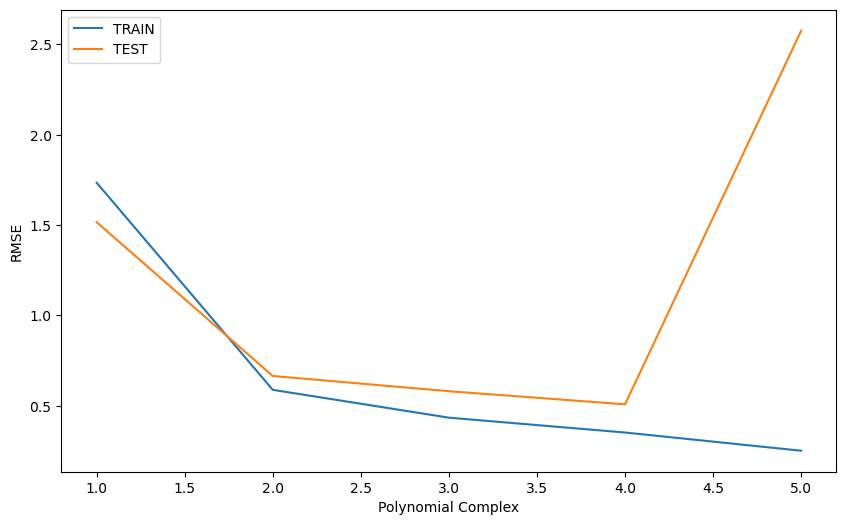

In [40]:
# let's look at the visual from a closer point

# let's look at the visual from a closer point
plt.plot(range(1,6), poly(6)["train_rmse_errors"], label = "TRAIN")
plt.plot(range(1,6), poly(6)["test_rmse_errors"], label = "TEST")
plt.xlabel("Polynomial Complex")
plt.ylabel("RMSE")
plt.legend()
plt.show();

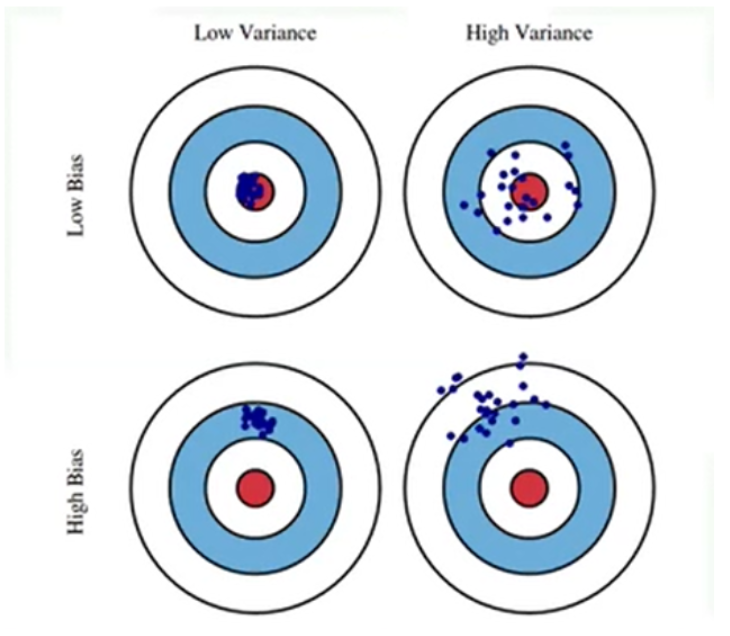

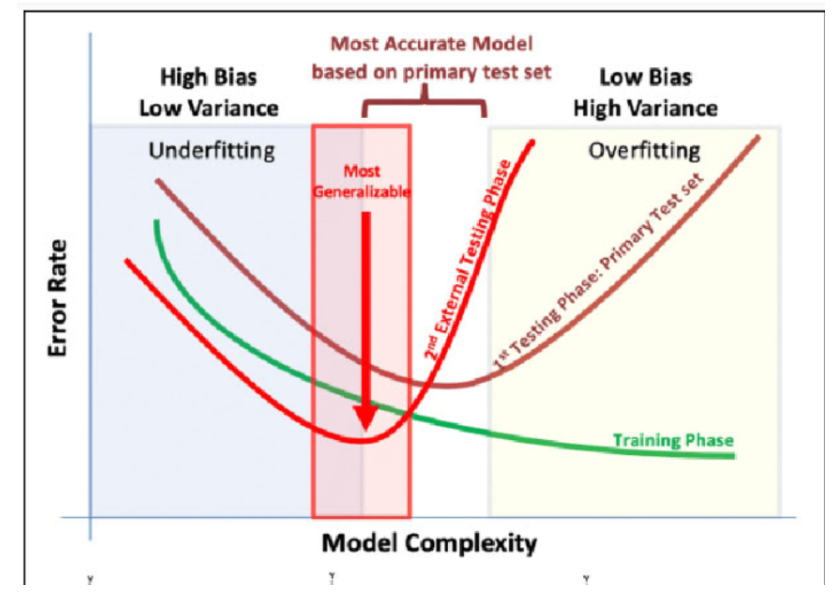

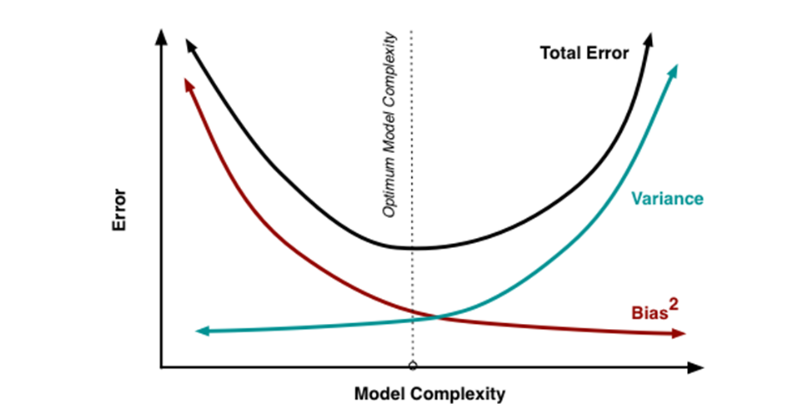

## Finalizing Model Choice

I will decide that my model is 3rd order on this notebook and I will make my final model accordingly.

I want to train my model with maximum data (for a better training) and I give all my data into the model fit

In [40]:
# Let's continue by accepting that the optimum degree is degree 3, let's build the final model with this information
# we want to get better results by training the model with all the data. Train-test part no longer exists
final_poly_conv = PolynomialFeatures(degree=3,include_bias=False)

# We'll train our model with the 3rd degree...we'll train...

In [41]:
final_model = LinearRegression()

In [42]:
# I fit my model, I use Polymomial Feature instead of X and generate feature for 3rd order.
# I take the final_poly_conv variable and fit all the data with (X)
final_model.fit(final_poly_conv.fit_transform(X),y)

LinearRegression()

## Prediction

In [43]:
# while making prediction, we give as many features as the initial number of features
new_record = [[150,20,15]]

In [44]:
# converted to polynomial feature
new_record_poly = final_poly_conv.fit_transform(new_record)

In [46]:
new_record_poly

array([[1.500e+02, 2.000e+01, 1.500e+01, 2.250e+04, 3.000e+03, 2.250e+03,
        4.000e+02, 3.000e+02, 2.250e+02, 3.375e+06, 4.500e+05, 3.375e+05,
        6.000e+04, 4.500e+04, 3.375e+04, 8.000e+03, 6.000e+03, 4.500e+03,
        3.375e+03]])

In [45]:
# we predicted the new state with final_model information
final_model.predict(new_record_poly)


array([14.24950844])

# Overfitting

In [48]:
# Let's generate a feature based on the 5th degree, which is the point where overfitting starts in the graph above (where train and test diverge)
# Let's watch the occurrence of overfitting


In [46]:
over_poly_converter = PolynomialFeatures(degree=5, include_bias=False)
# We generate a 5th order polynomial features

In [47]:
over_model = LinearRegression()

In [64]:
X_train, X_test, y_train, y_test = train_test_split(over_poly_converter.fit_transform(X),y, test_size=0.3,random_state=101)

In [60]:
y_test.shape

(60,)

In [65]:
over_model.fit(X_train,y_train)

LinearRegression()

In [66]:
y_pred_over = over_model.predict(X_test)

In [67]:
y_pred_over.shape

(60,)

In [68]:
eval_metric(y_test,y_pred_over)

Model testing performance:
--------------------------
R2_score 	: 0.7649888518703625
MAE 		: 0.6659574891491746
MSE 		: 6.634873249711867
RMSE 		: 2.5758247707699113


In [57]:
# train scores
y_train_pred_over = over_model.predict(X_train)

In [58]:
eval_metric(y_train,y_train_pred_over)

Model testing performance:
--------------------------
R2_score 	: 0.9977344910837891
MAE 		: 0.18386108189913639
MSE 		: 0.059449200976341085
RMSE 		: 0.24382206827180572


In [ ]:
# There is a significant difference between the train R2 of 0.99 and the test R2 of 0.76. This difference showed us overfitting
# overfitting was diagnosed because the train set had very good scores but the test set had bad scores

## Underfitting

The scores below are the scores we got for degree=1. According to Degree=3, the trainnig part performed poorly in the lower scores